<a href="https://colab.research.google.com/github/Rene-HN/Getting-SQL-DAta-into-Python/blob/master/Ebird_AB_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Relationship exploration between  Birds, Demographic and Economic metrics.

## Introduction: Birds as Environmental Indicators

Purpose of the study:

* The citizen scientist concept is helping collect robust data  on projects like eBird. The eBird Database have been effective on collecting data that describe the birds distributions on a global scale. 
* In this case we will use the eBird data to  explore relationships between sets that could lead to the development of a model that would detect an instance of environmental degradation.
* Traditionally pollution is cause by the externalities of the economic activities, we will use the GDP to explore any possible relationship with the birds distributions.
* Also, we will use census data to explore any possible relationship between humans population and bird distributions.

Data Sources

* eBird:collective enterprise that takes a novel approach to citizen science.
Temporal scope
3/5/1810 - 12/31/2019 

* United State Census Bureau
National Intercensal Datasets
2019 TIGER/Line Shapefiles.

* The U.S. Bureau of Economic Analysis
Real Gross Domestic Product (GDP) by state.
Chained-dollars based on 2012 period.




In [2]:
! pip install pingouin

     |████████████████████████████████| 204kB 5.4MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.10-cp36-none-any.whl size=203397 sha256=07648e3649dfd8263ef2b6e63a738fdb9d3629f4c17bfa9139550df9bd07e3ae
  Stored in directory: /root/.cache/pip/wheels/e6/f4/06/b5046209e6c0d96b4dea243c45e926b5c0dd88e23b01c45f92
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4961 sha256=22d1bde9bbcd037365dfed1ac4ec102844d600ef2ce5b53eb0d2b7f2164c0187
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7051 sha256=01e6452433d92395f4fc237889975672a07e743531cfe0d4c722e6bbe58e36cc
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import modin.pandas as pd
from scipy import stats
import statsmodels.api as sm
import pingouin as pg
import seaborn as sns



In [4]:
pd.options.display.max_rows= 1500 #This code allows us to see the full rows
pd.options.display.max_columns= 1500 #This code allows us to see the full columns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
eB_US_State_GDP_Pop1 = pd.read_csv(r'/content/drive/My Drive/Thinkful/Capstone 1/eB_US_State_GDP_Pop1.csv')

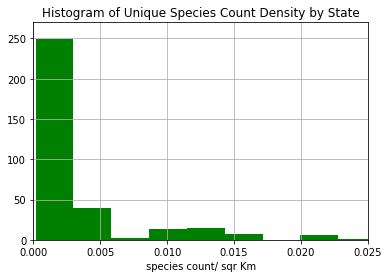

DescribeResult(nobs=1173, minmax=(0.0001792009441017139, 1.4122092893036982), mean=0.028963165224825258, variance=0.0273027310875642, skewness=7.040881292497089, kurtosis=48.55491346007279)


In [7]:
# the histogram of the data
n, bins, patches = plt.hist(eB_US_State_GDP_Pop1['species_density'], 500, density=True, facecolor='g', alpha=1)


plt.xlabel('species count/ sqr Km')
plt.title('Histogram of Unique Species Count Density by State')
plt.xlim(0, 0.025)
plt.ylim(0, 270)
plt.grid(True)
plt.show()
print(stats.describe(eB_US_State_GDP_Pop1['species_density']))

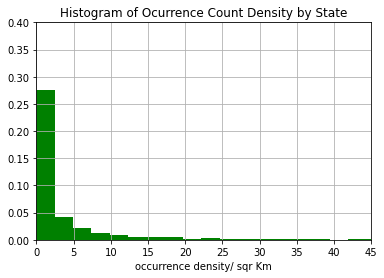

DescribeResult(nobs=1173, minmax=(0.002435734282081857, 1231.5481793416548), mean=10.296522453880478, variance=3872.823485925666, skewness=13.705431774480653, kurtosis=216.15555707031686)


In [8]:
# the histogram of the data
n, bins, patches = plt.hist(eB_US_State_GDP_Pop1['occurrence_density'], 500,  density=True, facecolor='g')


plt.xlabel('occurrence density/ sqr Km')
plt.title('Histogram of Ocurrence Count Density by State')
plt.xlim(0, 45)
plt.ylim(0, .4)
plt.grid(True)
plt.show()
print(stats.describe(eB_US_State_GDP_Pop1['occurrence_density']))

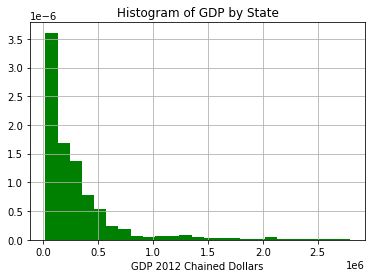

DescribeResult(nobs=1173, minmax=(20026.1, 2792029.1), mean=300538.80707587383, variance=139596406094.7273, skewness=3.0889066414766, kurtosis=11.876322158144406)


In [9]:
# the histogram of the data
n, bins, patches = plt.hist(eB_US_State_GDP_Pop1['GDP'], 25,  density=True, facecolor='g')


plt.xlabel('GDP 2012 Chained Dollars')
plt.title('Histogram of GDP by State')
plt.grid(True)
plt.show()
print(stats.describe(eB_US_State_GDP_Pop1['GDP']))

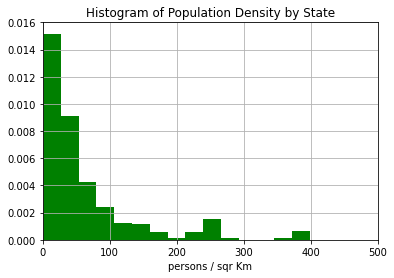

DescribeResult(nobs=1173, minmax=(0.3530931327267058, 3986.661174867183), mean=127.91294319870894, variance=225514.29814119675, skewness=6.759730551879477, kurtosis=45.36019979667508)


In [10]:
# the histogram of the data
n, bins, patches = plt.hist(eB_US_State_GDP_Pop1['population_density'], 150,  density=True, facecolor='g')


plt.xlabel('persons / sqr Km')
plt.title('Histogram of Population Density by State')
plt.grid(True)
plt.xlim(0, 500)
plt.ylim(0, .016)
plt.show()
print(stats.describe(eB_US_State_GDP_Pop1['population_density']))

## Spearman Correlation Test

In [11]:
#GDP vs. Species Density(No. Spcs/ SQ Km)
pg.corr(x=eB_US_State_GDP_Pop1['GDP'],
        y=eB_US_State_GDP_Pop1['species_density'],
        method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,1173,0.041977,"[-0.02, 0.1]",0.001762,0.000056,0.150781,0.300902


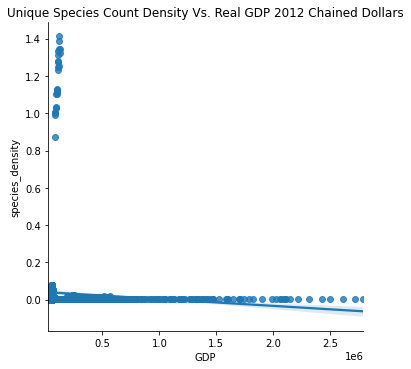

In [12]:

sns.lmplot(x='GDP', y='species_density', data=eB_US_State_GDP_Pop1)
plt.title("Unique Species Count Density Vs. Real GDP 2012 Chained Dollars");

pearman r=0.041977, p=0.150781
(fail to reject H0)


In [13]:
#population_density (No. people/ SQ Km) vs Species Density(No. Spcs/ SQ Km)
pg.corr(x=eB_US_State_GDP_Pop1['population_density'], y=eB_US_State_GDP_Pop1['species_density'],  method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,1173,0.714799,"[0.69, 0.74]",0.510938,0.510102,4.320186e-184,1.0


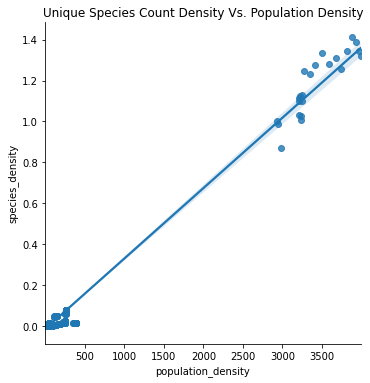

In [14]:

sns.lmplot(x='population_density',
           y='species_density',
           data=eB_US_State_GDP_Pop1)
plt.title("Unique Species Count Density Vs. Population Density");

Spearman r=0.714799, p=4.320186e-184
(reject H0)


In [15]:
# GDP vs Occurrence Density(No. Occrr/ SQ Km)
pg.corr(x=eB_US_State_GDP_Pop1['GDP'],
y=eB_US_State_GDP_Pop1['occurrence_density'],
method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,1173,0.397223,"[0.35, 0.44]",0.157786,0.156347,1.262781e-45,1.0


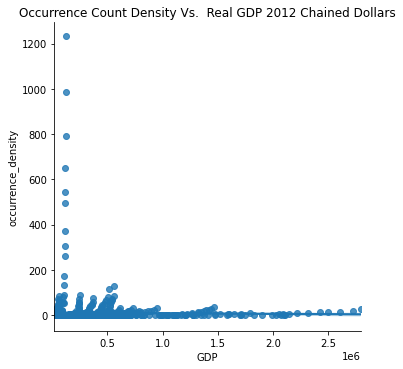

In [16]:
sns.lmplot(x='GDP',
           y='occurrence_density',
           data=eB_US_State_GDP_Pop1)
plt.title("Occurrence Count Density Vs.  Real GDP 2012 Chained Dollars");

Spearman r=0.397223, p=1.262781e-45
(reject H0)


In [17]:
# Population Density vs Occurrence Density(No. Occrr/ SQ Km)
pg.corr(x=eB_US_State_GDP_Pop1['population_density'],
        y=eB_US_State_GDP_Pop1['occurrence_density'],
        method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,1173,0.622517,"[0.59, 0.66]",0.387527,0.38648,8.166804e-127,1.0


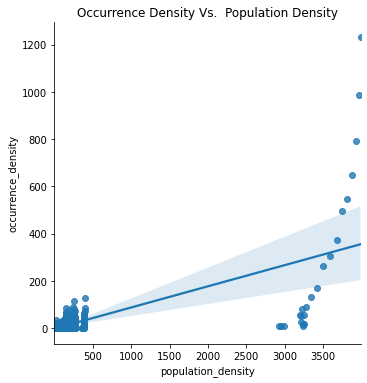

In [18]:
sns.lmplot(x='population_density',
           y='occurrence_density',
           data=eB_US_State_GDP_Pop1)
plt.title("Occurrence Density Vs.  Population Density");

Spearman r=0.622517, p=8.166804e-127
(reject H0)


## Kruskal-Wallis test

In [19]:
eB_2001_ocurrenceD = x=eB_US_State_GDP_Pop1[eB_US_State_GDP_Pop1['year'] == 2001]['occurrence_density']
eB_2011_ocurrenceD = x=eB_US_State_GDP_Pop1[eB_US_State_GDP_Pop1['year'] == 2011]['occurrence_density']
eB_2019_ocurrenceD = x=eB_US_State_GDP_Pop1[eB_US_State_GDP_Pop1['year'] == 2019]['occurrence_density']

In [20]:
stat, p =stats.kruskal(eB_2001_ocurrenceD , eB_2011_ocurrenceD ,eB_2019_ocurrenceD )
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=89.441, p=0.000
Different distributions (reject H0)


In [21]:
eB_2001_speciesD = x=eB_US_State_GDP_Pop1[eB_US_State_GDP_Pop1['year'] == 2001]['species_density']
eB_2011_speciesD = x=eB_US_State_GDP_Pop1[eB_US_State_GDP_Pop1['year'] == 2011]['species_density']
eB_2019_speciesD = x=eB_US_State_GDP_Pop1[eB_US_State_GDP_Pop1['year'] == 2019]['species_density']

In [22]:
stat, p =stats.kruskal(eB_2001_speciesD , eB_2011_speciesD ,eB_2019_speciesD )
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=1.055, p=0.590
Same distributions (fail to reject H0)


In [23]:
eB_2001_GDP = x=eB_US_State_GDP_Pop1[eB_US_State_GDP_Pop1['year'] == 2001]['GDP']
eB_2011_GDP = x=eB_US_State_GDP_Pop1[eB_US_State_GDP_Pop1['year'] == 2011]['GDP']
eB_2019_GDP = x=eB_US_State_GDP_Pop1[eB_US_State_GDP_Pop1['year'] == 2019]['GDP']

In [24]:
stat, p =stats.kruskal(eB_2001_GDP , eB_2011_GDP ,eB_2019_GDP )
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=2.196, p=0.334
Same distributions (fail to reject H0)


In [25]:
eB_2001_Population = x=eB_US_State_GDP_Pop1[eB_US_State_GDP_Pop1['year'] == 2001]['Population']
eB_2011_Population = x=eB_US_State_GDP_Pop1[eB_US_State_GDP_Pop1['year'] == 2011]['Population']
eB_2019_Population = x=eB_US_State_GDP_Pop1[eB_US_State_GDP_Pop1['year'] == 2019]['Population']

In [26]:
stat, p =stats.kruskal(eB_2001_Population , eB_2011_Population ,eB_2019_Population )
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=0.699, p=0.705
Same distributions (fail to reject H0)


In [27]:
eB_US_State_GDP_Pop2 = eB_US_State_GDP_Pop1.groupby(['year'], as_index=False).occurrence_count.sum()

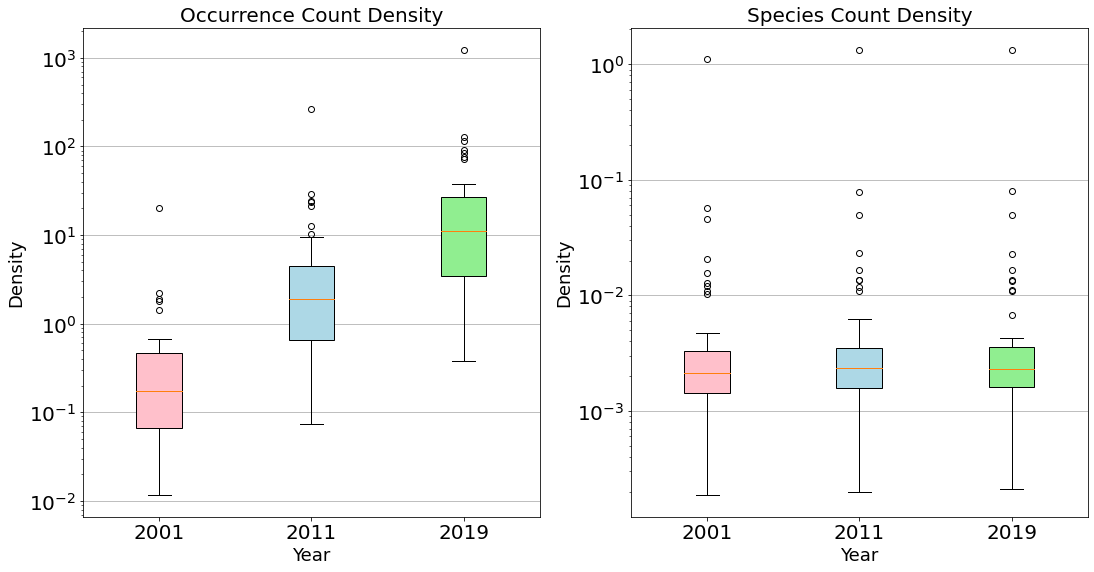

In [28]:
data_occurrence = [eB_2001_ocurrenceD, eB_2011_ocurrenceD, eB_2019_ocurrenceD]
data_species = [eB_2001_speciesD, eB_2011_speciesD, eB_2019_speciesD]
fontsize=40
labels = ['2001', '2011', '2019']

fig, (ax2, ax3) = plt.subplots(nrows=1, ncols=2, figsize=(18,9))


# occurrence box plot
bplot1=ax2.boxplot(data_occurrence ,
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            labels=labels)  # will be used to label x-ticks
ax2.set_yscale('log')
ax2.set_title('Occurrence Count Density', fontsize=20)


# occurrence box plot
bplot2=ax3.boxplot(data_species,
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            labels=labels)  # will be used to label x-ticks
ax3.set_yscale('log', )
ax3.set_title('Species Count Density', fontsize=20)


# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax2, ax3]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Year',  fontsize=18)
    ax.set_ylabel('Density',  fontsize=18)
    
ax2.tick_params(labelsize = 20)
ax3.tick_params(labelsize = 20)
plt.show()

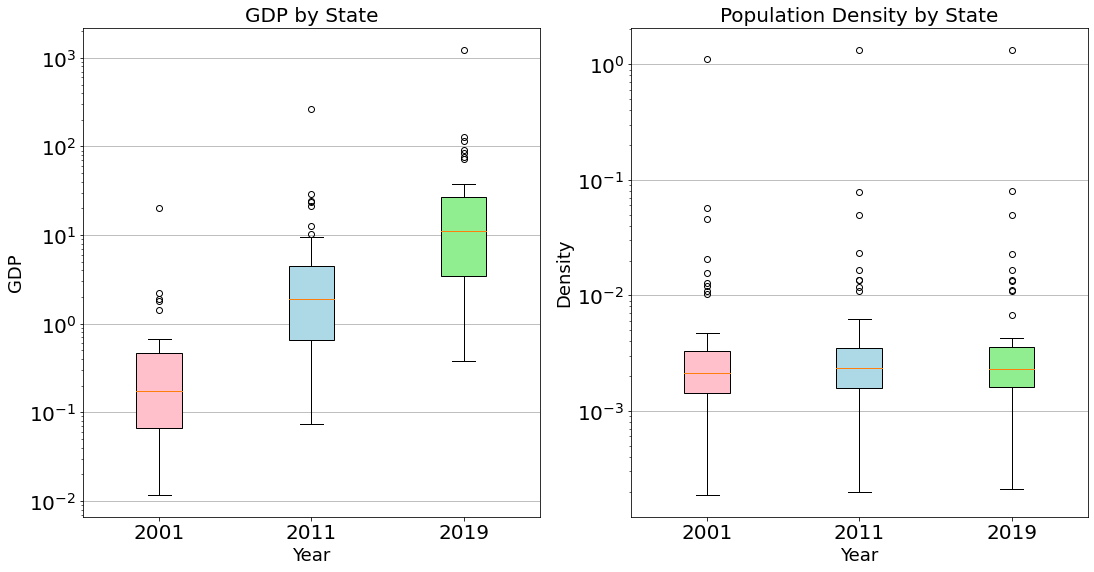

In [29]:
data_GDP = [eB_2001_GDP, eB_2011_GDP, eB_2019_GDP]
data_Population = [eB_2001_Population, eB_2011_Population, eB_2019_Population]

labels = ['2001', '2011', '2019']

fig, (ax5, ax6) = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))

# occurrence box plot
bplot3=ax5.boxplot(data_occurrence ,
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            labels=labels)  # will be used to label x-ticks
ax5.set_yscale('log')
ax5.set_title('GDP by State', fontsize=20)

# occurrence box plot
bplot4=ax6.boxplot(data_species,
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            labels=labels)  # will be used to label x-ticks
ax6.set_yscale('log')
ax6.set_title('Population Density by State', fontsize=20)

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot3, bplot4):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines

    ax5.yaxis.grid(True)
    ax5.set_xlabel('Year',  fontsize=18)
    ax5.set_ylabel('GDP',  fontsize=18)
    ax6.yaxis.grid(True)
    ax6.set_xlabel('Year',  fontsize=18)
    ax6.set_ylabel('Density',  fontsize=18)

ax5.tick_params(labelsize = 20)
ax6.tick_params(labelsize = 20)
plt.show()

## Data Interpretation

* Significant difference in occurrence density between the years 2001, 2011 and 2019. 
* No significant difference in GDP, Population Density or Unique Species Count Density between the years 2001, 2011 and 2019.
* No correlations between Unique Species Density and GDP.
* Strong positive correlation between Unique Species Density and Population Density.
* Moderate positive correlations between Occurrence Density with GDP and Population Density.



## CONCLUSION 

More testing is required to identify a relationship that would allow using the eBird database as a environmental indicator. Some recommendations are:
* Focus on specific species, maybe the most sensitive ones.
* Using Current Value GDP (instead of Real GDP) and correct for inflation in the study to have a larger dataset. Real GDP dataset begins in 1997. 
* Breaking down the GDP data by industry group.
* Including pollution discharges data from EPA permits.

